<a href="https://colab.research.google.com/github/christopherhomen/talentotech/blob/main/Experiencia/Regresi%C3%B3n_Lineal_M%C3%BAltiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

data = {
    "y":  [78.5, 74.3, 104.3, 87.6, 95.9, 109.2, 102.7, 72.5, 93.1, 115.9, 83.8, 113.3, 109.4],
    "X1": [7, 1, 11, 11, 7, 11, 3, 1, 2, 21, 1, 11, 10],
    "X2": [26, 29, 56, 31, 52, 55, 71, 31, 54, 47, 40, 66, 68],
    "X3": [6, 15, 8, 8, 6, 9, 17, 22, 18, 4, 23, 9, 8],
    "X4": [60, 52, 20, 47, 33, 22, 6, 44, 22, 26, 34, 12, 12]
}

df = pd.DataFrame(data)
print(df)


        y  X1  X2  X3  X4
0    78.5   7  26   6  60
1    74.3   1  29  15  52
2   104.3  11  56   8  20
3    87.6  11  31   8  47
4    95.9   7  52   6  33
5   109.2  11  55   9  22
6   102.7   3  71  17   6
7    72.5   1  31  22  44
8    93.1   2  54  18  22
9   115.9  21  47   4  26
10   83.8   1  40  23  34
11  113.3  11  66   9  12
12  109.4  10  68   8  12


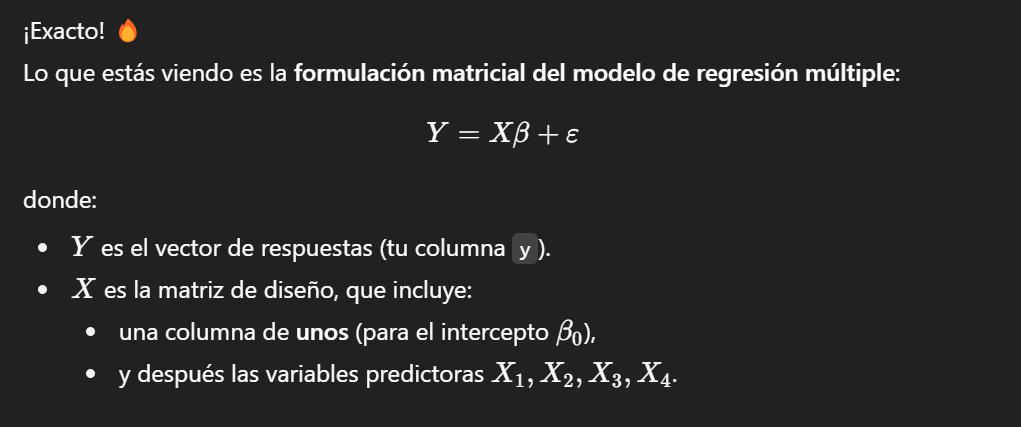

¿Qué significa en términos de regresión?

Cada fila de X corresponde a una observación (un caso en tu tabla).

La primera columna de 1's asegura que el modelo incluya el intercepto
𝛽
0
β
0
	​

.

Luego siguen las columnas con los valores de tus variables
𝑋
1
,
𝑋
2
,
𝑋
3
,
𝑋
4
X
1
	​

,X
2
	​

,X
3
	​

,X
4
	​

.

In [2]:
import numpy as np   # Importamos Numpy, una librería que nos permite trabajar con arreglos y matrices,
                     # y hacer operaciones matemáticas de álgebra lineal fácilmente.

# =====================================================================================
# PASO 1: Tomar las columnas X1, X2, X3 y X4 del DataFrame df
# =====================================================================================
# Supongamos que ya tenemos un DataFrame (df) con las columnas:
#   y, X1, X2, X3, X4
# Aquí extraemos solamente las columnas X1..X4, porque estas son nuestras variables "predictoras".
# Ejemplo: edad, estatura, ingresos, etc.
# El método .values convierte esas columnas en una matriz de Numpy (más fácil para hacer matemáticas).
X_vars = df[['X1','X2','X3','X4']].values

# =====================================================================================
# PASO 2: Crear una columna de unos
# =====================================================================================
# En regresión, además de las variables, necesitamos un término "extra" que se llama intercepto (β0).
# Para que aparezca en la ecuación, debemos poner una columna llena de 1's.
# Multiplicar β0 * 1 = β0 en cada fila, así aseguramos que siempre está presente en la suma.
# X_vars.shape[0] = número de filas en nuestros datos (cuántos registros hay).
# El "1" indica que será UNA columna de ancho.
intercepto = np.ones((X_vars.shape[0], 1))

# =====================================================================================
# PASO 3: Unir la columna de 1's con nuestras variables X1..X4
# =====================================================================================
# np.hstack apila matrices "horizontalmente", o sea, pone columnas una al lado de la otra.
# El resultado será una matriz con 5 columnas:
#   [1, X1, X2, X3, X4]
# Cada fila representa un caso (una observación de tus datos).
X = np.hstack([intercepto, X_vars])

# =====================================================================================
# PASO 4: Imprimir la matriz resultante
# =====================================================================================
# Ahora mostramos cómo queda la matriz X.
# Cada fila comienza con un 1 (para β0) y luego los valores originales de X1..X4.
print("Matriz X:")
print(X)


Matriz X:
[[ 1.  7. 26.  6. 60.]
 [ 1.  1. 29. 15. 52.]
 [ 1. 11. 56.  8. 20.]
 [ 1. 11. 31.  8. 47.]
 [ 1.  7. 52.  6. 33.]
 [ 1. 11. 55.  9. 22.]
 [ 1.  3. 71. 17.  6.]
 [ 1.  1. 31. 22. 44.]
 [ 1.  2. 54. 18. 22.]
 [ 1. 21. 47.  4. 26.]
 [ 1.  1. 40. 23. 34.]
 [ 1. 11. 66.  9. 12.]
 [ 1. 10. 68.  8. 12.]]


In [3]:
import numpy as np  # Numpy nos ayuda a trabajar con matrices y hacer cuentas "de calculadora científica"

# =====================================================================================
# Supuesto: ya existe un DataFrame llamado df con estas columnas: y, X1, X2, X3, X4.
# - 'y'  es lo que queremos predecir (la "respuesta").
# - 'X1'..'X4' son las variables que usamos para predecir (los "ingredientes").
# =====================================================================================

# ========= PASO 1. Tomar las X "crudas" del DataFrame =========
# Aquí extraemos SOLO las columnas X1..X4 y las convertimos a matriz Numpy.
# Imagina una tabla con N filas (personas/observaciones) y 4 columnas (características).
X_vars = df[['X1','X2','X3','X4']].values   # Dimensión: (N, 4)

# ========= PASO 2. Crear la columna de unos (el "intercepto") =========
# ¿Por qué una columna de unos? En la ecuación de la recta/multirrecta hay un término "fijo",
# llamado intercepto (β0). Multiplicar β0 por 1 en cada fila es la forma de incluir ese fijo.
# Piensa en una cuenta de restaurante: siempre hay un "cargo base" aunque pidas poco; ese es β0.
intercepto = np.ones((X_vars.shape[0], 1))  # Una columna con puros 1, una por cada fila. Dimensión: (N, 1)

# ========= PASO 3. Construir la matriz X completa =========
# Pegamos la columna de 1's ADELANTE, y luego las columnas X1..X4.
# Resultado: X tiene 5 columnas: [1, X1, X2, X3, X4]
# Cada fila representa una observación; la primera columna vale 1 SIEMPRE.
X = np.hstack([intercepto, X_vars])         # Dimensión: (N, 5)

# ========= PASO 4. Tomar y como vector columna =========
# y es lo que queremos predecir. Lo dejamos como matriz columna (N, 1) para que las
# fórmulas de álgebra funcionen sin enredos.
y = df[['y']].values                        # Dimensión: (N, 1)

# ========= (Opcional) Ver la "matriz aumentada" [X | y] =========
# Esto solo es para mirarla al estilo de los libros: X y y una al lado de la otra.
# OJO: no se "invierte" esto; es pura visualización.
XY_aumentada = np.hstack([X, y])

print("Matriz X (con 1's en la PRIMERA COLUMNA):\n", X)
print("\nVector y (como columna):\n", y.ravel())  # .ravel() lo muestra en una línea, más compacto
print("\nMatriz aumentada [X | y] (solo para ver):\n", XY_aumentada)

# ========= PASO 5. Calcular (X^T X) y su inversa =========
# En regresión NO invertimos X (suele ser rectangular). La magia se hace con la "matriz normal":
#   XtX = X^T X    (X transpuesta por X)  --> esta sí es cuadrada y se puede intentar invertir.
# Con el símbolo @ hacemos multiplicación de matrices (como en álgebra).
XtX = X.T @ X                      # Dimensión: (5, 5) porque X tiene 5 columnas
inv_XtX = np.linalg.inv(XtX)       # Inversa de XtX (si no se puede, Numpy lanza error)

# ========= PASO 6. Calcular los coeficientes β =========
# Fórmula de mínimos cuadrados:
#   β = (X^T X)^(-1) X^T y
# β es un vector con 5 números: [β0, β1, β2, β3, β4]
beta = inv_XtX @ X.T @ y           # Dimensión: (5, 1)

print("\n(X^T X):\n", XtX)
print("\nInv(X^T X):\n", inv_XtX)
print("\nCoeficientes β = [β0, β1, β2, β3, β4]:\n", beta.ravel())

# =====================================================================================
# NOTAS QUE AYUDAN A ENTENDER:
# - "Primera COLUMNA de 1's" ≠ "Primera FILA de 1's". Lo correcto es COLUMNA.
# - β0 (el intercepto) es el "piso" o "cargo base" de la predicción.
# - Con β ya puedes predecir: y_hat = X @ beta
# - Si inv_XtX te diera problemas (matriz casi singular), se puede usar la pseudoinversa:
#       beta_estable = np.linalg.pinv(X) @ y
#   que hace lo mismo pero de manera más robusta numéricamente.
# =====================================================================================


Matriz X (con 1's en la PRIMERA COLUMNA):
 [[ 1.  7. 26.  6. 60.]
 [ 1.  1. 29. 15. 52.]
 [ 1. 11. 56.  8. 20.]
 [ 1. 11. 31.  8. 47.]
 [ 1.  7. 52.  6. 33.]
 [ 1. 11. 55.  9. 22.]
 [ 1.  3. 71. 17.  6.]
 [ 1.  1. 31. 22. 44.]
 [ 1.  2. 54. 18. 22.]
 [ 1. 21. 47.  4. 26.]
 [ 1.  1. 40. 23. 34.]
 [ 1. 11. 66.  9. 12.]
 [ 1. 10. 68.  8. 12.]]

Vector y (como columna):
 [ 78.5  74.3 104.3  87.6  95.9 109.2 102.7  72.5  93.1 115.9  83.8 113.3
 109.4]

Matriz aumentada [X | y] (solo para ver):
 [[  1.    7.   26.    6.   60.   78.5]
 [  1.    1.   29.   15.   52.   74.3]
 [  1.   11.   56.    8.   20.  104.3]
 [  1.   11.   31.    8.   47.   87.6]
 [  1.    7.   52.    6.   33.   95.9]
 [  1.   11.   55.    9.   22.  109.2]
 [  1.    3.   71.   17.    6.  102.7]
 [  1.    1.   31.   22.   44.   72.5]
 [  1.    2.   54.   18.   22.   93.1]
 [  1.   21.   47.    4.   26.  115.9]
 [  1.    1.   40.   23.   34.   83.8]
 [  1.   11.   66.    9.   12.  113.3]
 [  1.   10.   68.    8.   12.  109.4

In [4]:
import numpy as np  # Librería para manejar arreglos/matrices y álgebra lineal

# =====================================================================================
# SUPUESTO: ya tienes un DataFrame llamado `df` con columnas: y, X1, X2, X3, X4
#  - y  = variable que queremos predecir (respuesta)
#  - X1..X4 = variables explicativas (ingredientes para predecir y)
# =====================================================================================

# ========= PASO 1. Extraer las X "crudas" del DataFrame =========
# Tomamos solo las columnas X1..X4. Las convertimos a matriz Numpy de tipo float.
# Dimensiones: N filas (observaciones) x 4 columnas (características).
X_vars = df[['X1', 'X2', 'X3', 'X4']].to_numpy(dtype=float)

# ========= PASO 2. Crear la columna de unos (intercepto β0) =========
# Esta columna de 1's sirve para que el modelo incluya el "cargo base" (intercepto β0).
# Piensa en la cuenta del restaurante: siempre hay un fijo por sentarte; eso es β0.
intercepto = np.ones((X_vars.shape[0], 1), dtype=float)  # N filas x 1 columna de puros 1

# ========= PASO 3. Construir la matriz de diseño X =========
# Pegamos la columna de 1's ADELANTE y luego las columnas X1..X4.
# Resultado: X tiene 5 columnas -> [1, X1, X2, X3, X4]
X = np.hstack([intercepto, X_vars])  # Dimensión: (N, 5)

# ========= PASO 4. Vector y como columna =========
# y es la variable a predecir. La dejamos como matriz columna (N, 1) para que
# las fórmulas matriciales funcionen perfecto.
y = df[['y']].to_numpy(dtype=float)  # Dimensión: (N, 1)

# ========= (Opcional) PASO 4.1. "Matriz aumentada" [X | y] para visualizar =========
# Solo para verlo al estilo de los apuntes; NO se invierte esta matriz.
XY_aumentada = np.hstack([X, y])

# --- Impresiones útiles para entender tamaños y contenido ---
print("Forma (tamaño) de X:", X.shape)         # Espera (N, 5)
print("Forma (tamaño) de y:", y.shape)         # Espera (N, 1)
print("\nPrimera fila de X (debería empezar con 1):\n", X[0])
print("\n¿Toda la PRIMERA COLUMNA de X son 1's?:", np.allclose(X[:, 0], 1.0))
print("\nMatriz X (primeras 5 filas):\n", X[:5])
print("\nVector y (primeras 5 filas):\n", y[:5].ravel())
print("\nMatriz aumentada [X | y] (primeras 5 filas):\n", XY_aumentada[:5])

# ========= PASO 5. Construir la "matriz normal" XtX = X^T X e invertirla =========
# En regresión NO invertimos X (no es cuadrada). Invertimos X^T X, que sí es cuadrada.
Xt  = X.T                 # Transpuesta de X: (5, N)
XtX = Xt @ X              # (5, 5)
det_XtX = np.linalg.det(XtX)      # Determinante: si es ≠ 0, la matriz es invertible
cond_XtX = np.linalg.cond(XtX)    # Número de condición: si es muy grande, hay inestabilidad numérica

print("\nX^T X =\n", XtX)
print("\nDeterminante de (X^T X):", det_XtX, "(debe ser distinto de 0)")
print("Número de condición de (X^T X):", cond_XtX, "(mientras más pequeño, mejor)")

# Inversa de (X^T X). Si estuviera muy mal condicionada y fallara, usaríamos pseudoinversa (ver PASO 8).
inv_XtX = np.linalg.inv(XtX)
print("\nInversa de (X^T X) =\n", inv_XtX)

# ========= PASO 6. Calcular los coeficientes β por Mínimos Cuadrados =========
# Fórmula:  β = (X^T X)^(-1) X^T y
beta = inv_XtX @ Xt @ y   # (5, 1) -> [β0, β1, β2, β3, β4] como columna

print("\nCoeficientes β (como vector columna):\n", beta)
print("\nCoeficientes β en una sola línea [β0, β1, β2, β3, β4]:\n", beta.ravel())
print("\nCoeficientes β redondeados (4 decimales):\n", np.round(beta.ravel(), 4))

# ========= PASO 7. Predicciones, residuos y métricas de ajuste =========
# y_hat: valores estimados por el modelo
y_hat = X @ beta                    # (N, 1)
# residuos: diferencia entre lo observado y lo estimado
residuos = y - y_hat                # (N, 1)

# SSE / Sr: Suma de los residuos al cuadrado (Error de Residuo)
Sr = float((residuos.T @ residuos))     # número escalar
# SST / St: Suma total de cuadrados respecto a la media de y
St = float(((y - y.mean()).T @ (y - y.mean())))
# SSR: Suma de los cuadrados explicados por el modelo (St - Sr)
SSR = St - Sr

# R^2: proporción de la variabilidad de y explicada por el modelo
R2 = 1 - Sr / St

# R^2 ajustado: penaliza por número de variables (más justo con pocos datos)
N = X.shape[0]        # número de observaciones
p = X.shape[1] - 1    # número de predictores SIN contar el intercepto (aquí: 4)
k = p + 1             # total de parámetros (con intercepto): aquí 5
gl_resid = N - k      # grados de libertad del error
R2_adj = 1 - (Sr / gl_resid) / (St / (N - 1))

print("\n--- Métricas de ajuste ---")
print("Sr (SSE, suma residuos^2):", Sr)
print("St (SST, total):", St)
print("SSR (explicada):", SSR)
print("R^2:", R2)
print("R^2 ajustado:", R2_adj)
print("Grados de libertad del error (N - k):", gl_resid)

# ========= PASO 7.1. Errores estándar de β (para entender la precisión de cada coeficiente) =========
# Estimación de la varianza del error: sigma^2 = Sr / (N - k)
sigma2 = Sr / gl_resid
# Var-Cov(β) = sigma^2 * (X^T X)^(-1)
VarBeta = sigma2 * inv_XtX
# Error estándar de cada β = raíz de la diagonal de VarBeta
se_beta = np.sqrt(np.diag(VarBeta))

print("\nVarianza estimada del error (sigma^2):", sigma2)
print("Errores estándar de β:", se_beta)

# ========= PASO 8. (Plan B) Pseudoinversa por si hubiera problemas numéricos =========
# Si la inversión fallara o el número de condición fuera muy grande, usamos:
beta_pinv = np.linalg.pinv(X) @ y
print("\nβ con pseudoinversa (más estable numéricamente):\n", beta_pinv.ravel())

# ========= PASO 9. (Opcional) Chequeos rápidos y salida amigable =========
# Convertimos β a un pequeño "reporte" con nombres:
nombres = np.array(["β0 (intercepto)", "β1 (X1)", "β2 (X2)", "β3 (X3)", "β4 (X4)"])
for nombre, val, se in zip(nombres, beta.ravel(), se_beta):
    print(f"{nombre:>15}: {val:10.6f}  ±  {se:10.6f}  (estimación ± error estándar)")

# Con β ya puedes predecir nuevos casos:
#   dado un nuevo vector x_nuevo = [1, X1, X2, X3, X4], la predicción es y_hat = x_nuevo @ β


Forma (tamaño) de X: (13, 5)
Forma (tamaño) de y: (13, 1)

Primera fila de X (debería empezar con 1):
 [ 1.  7. 26.  6. 60.]

¿Toda la PRIMERA COLUMNA de X son 1's?: True

Matriz X (primeras 5 filas):
 [[ 1.  7. 26.  6. 60.]
 [ 1.  1. 29. 15. 52.]
 [ 1. 11. 56.  8. 20.]
 [ 1. 11. 31.  8. 47.]
 [ 1.  7. 52.  6. 33.]]

Vector y (primeras 5 filas):
 [ 78.5  74.3 104.3  87.6  95.9]

Matriz aumentada [X | y] (primeras 5 filas):
 [[  1.    7.   26.    6.   60.   78.5]
 [  1.    1.   29.   15.   52.   74.3]
 [  1.   11.   56.    8.   20.  104.3]
 [  1.   11.   31.    8.   47.   87.6]
 [  1.    7.   52.    6.   33.   95.9]]

X^T X =
 [[1.3000e+01 9.7000e+01 6.2600e+02 1.5300e+02 3.9000e+02]
 [9.7000e+01 1.1390e+03 4.9220e+03 7.6900e+02 2.6200e+03]
 [6.2600e+02 4.9220e+03 3.3050e+04 7.2010e+03 1.5739e+04]
 [1.5300e+02 7.6900e+02 7.2010e+03 2.2930e+03 4.6280e+03]
 [3.9000e+02 2.6200e+03 1.5739e+04 4.6280e+03 1.5062e+04]]

Determinante de (X^T X): 27717211679.99304 (debe ser distinto de 0)
Número

/tmp/ipython-input-1566464346.py:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Sr = float((residuos.T @ residuos))     # número escalar
/tmp/ipython-input-1566464346.py:74: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  St = float(((y - y.mean()).T @ (y - y.mean())))


In [5]:
# ──────────────────────────────────────────────────────────────────────────────
# BLOQUE 0 (OPCIONAL)
# Si YA tienes tu DataFrame df con columnas y, X1, X2, X3, X4, puedes saltarte esto.
# Aquí solo recreamos los datos para que el ejemplo sea 100% reproducible.
# ──────────────────────────────────────────────────────────────────────────────
import pandas as pd

data = {
    "y":  [78.5, 74.3, 104.3, 87.6, 95.9, 109.2, 102.7, 72.5, 93.1, 115.9, 83.8, 113.3, 109.4],
    "X1": [7, 1, 11, 11, 7, 11, 3, 1, 2, 21, 1, 11, 10],
    "X2": [26, 29, 56, 31, 52, 55, 71, 31, 54, 47, 40, 66, 68],
    "X3": [6, 15, 8, 8, 6, 9, 17, 22, 18, 4, 23, 9, 8],
    "X4": [60, 52, 20, 47, 33, 22, 6, 44, 22, 26, 34, 12, 12]
}
df = pd.DataFrame(data)

# Mostrar una vista rápida para verificar que todo está bien
df


,y,X1,X2,X3,X4
0,78.5,7,26,6,60
1,74.3,1,29,15,52
2,104.3,11,56,8,20
3,87.6,11,31,8,47
4,95.9,7,52,6,33
5,109.2,11,55,9,22
6,102.7,3,71,17,6
7,72.5,1,31,22,44
8,93.1,2,54,18,22
9,115.9,21,47,4,26


In [6]:
# ──────────────────────────────────────────────────────────────────────────────
# BLOQUE 1
# Objetivo: Tomar las columnas X1..X4 del DataFrame y convertirlas a "matriz Numpy".
# Explicación "para la abuela":
# - Imagina una libreta con N filas (personas) y 4 columnas (características).
# - Queremos esa parte numérica para hacer cuentas de álgebra.
# ──────────────────────────────────────────────────────────────────────────────
import numpy as np

X_vars = df[['X1','X2','X3','X4']].to_numpy(dtype=float)  # (N, 4) solo las variables explicativas

print("Forma de X_vars (filas, columnas) =", X_vars.shape)
print("Primeras 5 filas de X_vars:\n", X_vars[:5])


Forma de X_vars (filas, columnas) = (13, 4)
Primeras 5 filas de X_vars:
 [[ 7. 26.  6. 60.]
 [ 1. 29. 15. 52.]
 [11. 56.  8. 20.]
 [11. 31.  8. 47.]
 [ 7. 52.  6. 33.]]


In [7]:
# ──────────────────────────────────────────────────────────────────────────────
# BLOQUE 2
# Objetivo: Añadir una COLUMNA de 1's al inicio. Esto crea el "intercepto" β0.
# Explicación "para la abuela":
# - En la cuenta del restaurante siempre hay un "cargo base": aunque no pidas nada,
#   te cobran la servilleta (😅). Ese cargo base es β0.
# - Para que el modelo pueda sumar ese cargo base, multiplicamos β0 por 1 en CADA FILA;
#   por eso agregamos una columna de unos.
# - OJO: es la PRIMERA COLUMNA de 1's, NO la primera FILA.
# ──────────────────────────────────────────────────────────────────────────────
intercepto = np.ones((X_vars.shape[0], 1), dtype=float)   # (N, 1) puros 1's
X = np.hstack([intercepto, X_vars])                       # (N, 5) -> [1, X1, X2, X3, X4]

print("Forma de X =", X.shape)
print("¿Toda la PRIMERA COLUMNA de X son 1's?:", np.allclose(X[:, 0], 1.0))
print("Primeras 5 filas de X:\n", X[:5])


Forma de X = (13, 5)
¿Toda la PRIMERA COLUMNA de X son 1's?: True
Primeras 5 filas de X:
 [[ 1.  7. 26.  6. 60.]
 [ 1.  1. 29. 15. 52.]
 [ 1. 11. 56.  8. 20.]
 [ 1. 11. 31.  8. 47.]
 [ 1.  7. 52.  6. 33.]]


In [8]:
# ──────────────────────────────────────────────────────────────────────────────
# BLOQUE 3
# Objetivo: Tener y como "columna" (N,1) y visualizar la matriz aumentada [X | y].
# Explicación "para la abuela":
# - y es lo que queremos predecir (el resultado). Lo ponemos de pie (columna) para
#   que las fórmulas de matrices funcionen como en los libros.
# - [X | y] es solo para VERLO junto (como en tus apuntes). No se invierte ni nada.
# ──────────────────────────────────────────────────────────────────────────────
y = df[['y']].to_numpy(dtype=float)           # (N, 1)
XY_aumentada = np.hstack([X, y])              # (N, 6) solo para mirar

print("Forma de y =", y.shape)
print("Primeras 5 filas de y:", y[:5].ravel())
print("Matriz aumentada [X | y] (primeras 5 filas):\n", XY_aumentada[:5])


Forma de y = (13, 1)
Primeras 5 filas de y: [ 78.5  74.3 104.3  87.6  95.9]
Matriz aumentada [X | y] (primeras 5 filas):
 [[  1.    7.   26.    6.   60.   78.5]
 [  1.    1.   29.   15.   52.   74.3]
 [  1.   11.   56.    8.   20.  104.3]
 [  1.   11.   31.    8.   47.   87.6]
 [  1.    7.   52.    6.   33.   95.9]]


In [9]:
# ──────────────────────────────────────────────────────────────────────────────
# BLOQUE 4
# Objetivo: Construir X^T X (X transpuesta por X) y analizar si se puede invertir.
# Explicación "para la abuela":
# - X no es cuadrada (tiene más filas que columnas), por eso NO la invertimos directa.
# - En regresión se usa la "matriz normal": XtX = X^T X, que sí es cuadrada.
# - Si su determinante es distinto de 0, se puede invertir (¡bien!).
# - "Número de condición": si es MUY grande, las cuentas pueden ser inestables
#   (como dividir por un número casi cero). Solo para estar atentos.
# ──────────────────────────────────────────────────────────────────────────────
Xt  = X.T
XtX = Xt @ X

det_XtX  = np.linalg.det(XtX)      # chequeo de invertibilidad
cond_XtX = np.linalg.cond(XtX)     # indicador de estabilidad numérica

print("X^T X:\n", XtX)
print("\nDeterminante de (X^T X):", det_XtX, "  (≠ 0 => se puede invertir)")
print("Número de condición de (X^T X):", cond_XtX, "  (más pequeño = mejor)")


X^T X:
 [[1.3000e+01 9.7000e+01 6.2600e+02 1.5300e+02 3.9000e+02]
 [9.7000e+01 1.1390e+03 4.9220e+03 7.6900e+02 2.6200e+03]
 [6.2600e+02 4.9220e+03 3.3050e+04 7.2010e+03 1.5739e+04]
 [1.5300e+02 7.6900e+02 7.2010e+03 2.2930e+03 4.6280e+03]
 [3.9000e+02 2.6200e+03 1.5739e+04 4.6280e+03 1.5062e+04]]

Determinante de (X^T X): 27717211679.99304   (≠ 0 => se puede invertir)
Número de condición de (X^T X): 36679306.58376667   (más pequeño = mejor)


In [10]:
# ──────────────────────────────────────────────────────────────────────────────
# BLOQUE 5
# Objetivo: Invertir (X^T X) y calcular los coeficientes β del modelo.
# Fórmula clásica de mínimos cuadrados:
#       β = (X^T X)^(-1) X^T y
# β = [β0, β1, β2, β3, β4]  → intercepto y pesos de cada X.
# ──────────────────────────────────────────────────────────────────────────────
inv_XtX = np.linalg.inv(XtX)       # inversa de (X^T X)
beta = inv_XtX @ Xt @ y            # (5, 1)

print("(X^T X)^(-1):\n", inv_XtX)
print("\nCoeficientes β (columna):\n", beta)
print("\nCoeficientes β en línea [β0, β1, β2, β3, β4]:\n", beta.ravel())
print("Coeficientes β redondeados (4 decimales):", np.round(beta.ravel(), 4))


(X^T X)^(-1):
 [[ 8.20654575e+02 -8.44180186e+00 -8.45777985e+00 -8.63453878e+00
  -8.28974378e+00]
 [-8.44180186e+00  9.27104019e-02  8.56862094e-02  9.26373566e-02
   8.44549553e-02]
 [-8.45777985e+00  8.56862094e-02  8.75602572e-02  8.78666397e-02
   8.55980995e-02]
 [-8.63453878e+00  9.26373566e-02  8.78666397e-02  9.52014097e-02
   8.63919188e-02]
 [-8.28974378e+00  8.44549553e-02  8.55980995e-02  8.63919188e-02
   8.40311912e-02]]

Coeficientes β (columna):
 [[62.4053693 ]
 [ 1.55110265]
 [ 0.51016758]
 [ 0.1019094 ]
 [-0.14406103]]

Coeficientes β en línea [β0, β1, β2, β3, β4]:
 [62.4053693   1.55110265  0.51016758  0.1019094  -0.14406103]
Coeficientes β redondeados (4 decimales): [62.4054  1.5511  0.5102  0.1019 -0.1441]


In [11]:
# ──────────────────────────────────────────────────────────────────────────────
# BLOQUE 6
# Objetivo: Medir qué tan bien ajusta el modelo.
# "Para la abuela":
# - y_hat = lo que el modelo predice.
# - residuo = lo que pasó en realidad menos lo que predije.
# - Sr (SSE) = suma de residuos al cuadrado → error total del modelo (más chico = mejor).
# - St (SST) = cuánta variación tiene y en general.
# - SSR = St - Sr = lo que el modelo sí logró explicar.
# - R^2 = proporción explicada (0 a 1; más cerca de 1 = mejor).
# - R^2 ajustado = versión que “castiga” por usar muchas variables.
# ──────────────────────────────────────────────────────────────────────────────
y_hat = X @ beta                # predicción (N, 1)
residuos = y - y_hat            # errores (N, 1)

Sr = float(residuos.T @ residuos)                  # SSE
St = float((y - y.mean()).T @ (y - y.mean()))      # SST
SSR = St - Sr                                      # explicado por el modelo

N = X.shape[0]        # número de filas (observaciones)
p = X.shape[1] - 1    # número de predictores (sin intercepto): aquí 4
k = p + 1             # total de parámetros (con intercepto): aquí 5
gl_resid = N - k      # grados de libertad del error

R2 = 1 - Sr/St
R2_adj = 1 - (Sr/gl_resid) / (St/(N-1))

print("Sr (SSE, suma de residuos^2):", Sr)
print("St (SST, total):", St)
print("SSR (explicada por el modelo):", SSR)
print("R^2:", R2)
print("R^2 ajustado:", R2_adj)
print("Grados de libertad del error (N - k):", gl_resid)


Sr (SSE, suma de residuos^2): 47.86363935049879
St (SST, total): 2715.7630769230777
SSR (explicada por el modelo): 2667.899437572579
R^2: 0.9823756204076802
R^2 ajustado: 0.9735634306115203
Grados de libertad del error (N - k): 8


/tmp/ipython-input-2009931956.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Sr = float(residuos.T @ residuos)                  # SSE
/tmp/ipython-input-2009931956.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  St = float((y - y.mean()).T @ (y - y.mean()))      # SST


In [12]:
# ──────────────────────────────────────────────────────────────────────────────
# BLOQUE 7
# Objetivo: Saber qué tan “precisos” son los coeficientes β.
# - sigma^2 ≈ varianza del error (qué tan dispersos son los residuos).
# - Var(β) = sigma^2 * (X^T X)^(-1)
# - Error estándar de β = raíz de la diagonal de Var(β)
#   (más pequeño → estimación más confiable).
# ──────────────────────────────────────────────────────────────────────────────
sigma2 = Sr / gl_resid                # varianza del error
VarBeta = sigma2 * inv_XtX            # matriz var-cov de β
se_beta = np.sqrt(np.diag(VarBeta))   # errores estándar (uno por coeficiente)

nombres = np.array(["β0 (intercepto)", "β1 (X1)", "β2 (X2)", "β3 (X3)", "β4 (X4)"])
for nombre, b, se in zip(nombres, beta.ravel(), se_beta):
    print(f"{nombre:>15}: {b:10.6f}  ±  {se:10.6f}")


β0 (intercepto):  62.405369  ±   70.070959
        β1 (X1):   1.551103  ±    0.744770
        β2 (X2):   0.510168  ±    0.723788
        β3 (X3):   0.101909  ±    0.754709
        β4 (X4):  -0.144061  ±    0.709052


In [13]:
# ──────────────────────────────────────────────────────────────────────────────
# BLOQUE 8 (OPCIONAL)
# Si la inversión de (X^T X) fallara (determinante ~ 0) o el "número de condición"
# fuera gigantesco (inestabilidad), usa la PSEUDOINVERSA:
# β = X^+ y  (donde X^+ es la pseudoinversa de Moore–Penrose)
# Es una forma "más robusta" de obtener los coeficientes.
# ──────────────────────────────────────────────────────────────────────────────
beta_pinv = np.linalg.pinv(X) @ y
print("β con pseudoinversa (Moore–Penrose):\n", beta_pinv.ravel())


β con pseudoinversa (Moore–Penrose):
 [62.4053693   1.55110265  0.51016758  0.1019094  -0.14406103]
